# Insurance Claims- Fraud Detection
### Problem Statement:

### Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [408]:
df = pd.read_csv('insurance.csv')

In [409]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,6/9/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10/1/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [410]:
pd.set_option('display.max_columns',None)

# EDA


### Missing Values

In [411]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Observation: _c39 has completely null values. It has to be removed

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [413]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

### Numerical values

In [414]:
df.dtypes!='O'

months_as_customer              True
age                             True
policy_number                   True
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable               True
policy_annual_premium           True
umbrella_limit                  True
insured_zip                     True
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                   True
capital-loss                    True
incident_date                  False
incident_type                  False
collision_type                 False
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day        True
number_of_vehicles_involved     True
p

In [415]:
num_cols = [col for col in df.columns if df[col].dtypes!='O']

In [416]:
num_cols

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 '_c39']

## Categorical Columns

In [417]:
cat_cols = [col for col in df.columns if df[col].dtypes=='O']

In [418]:
cat_cols

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

## Relationship between columns

### Univariate, Bi-Variate and Multi-variate Analysis

In [419]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

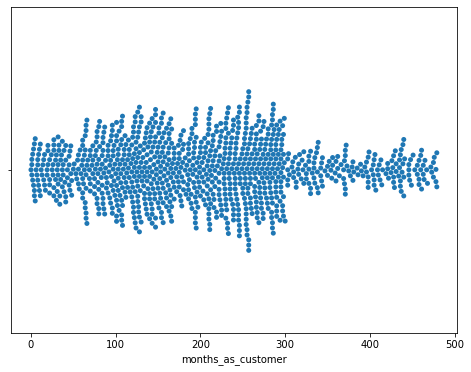

In [420]:
# Checking the months_as_customer column
plt.figure(figsize=(8,6))
sns.swarmplot( x="months_as_customer",data=df)
plt.show()

In [421]:
df['age'].nunique()

46

In [422]:
df['age'].value_counts()

43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64

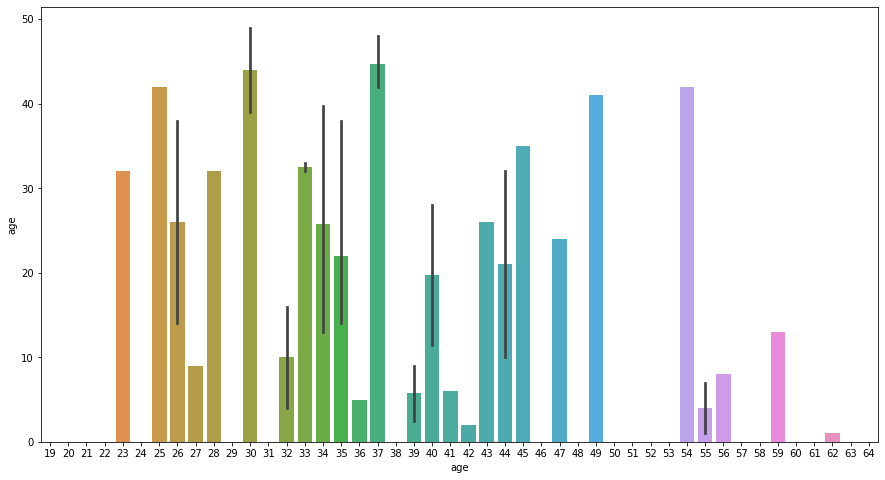

In [423]:
plt.figure(figsize=(15,8))
sns.barplot(x=df['age'],y=df['age'].value_counts())
plt.show()

In [424]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

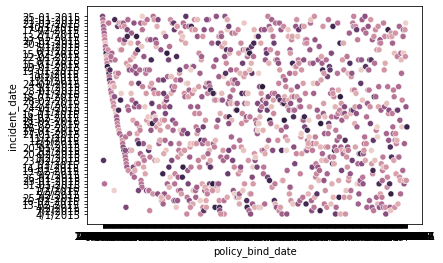

In [425]:
sns.scatterplot(x='policy_bind_date', y='incident_date',hue = 'months_as_customer',legend=False,data=df)
plt.show()

In [426]:
## Checking the fraud reported colun
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [427]:
df['fraud_reported'].value_counts().values

array([753, 247], dtype=int64)

In [428]:
fraud.index

Index(['N', 'Y'], dtype='object')

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

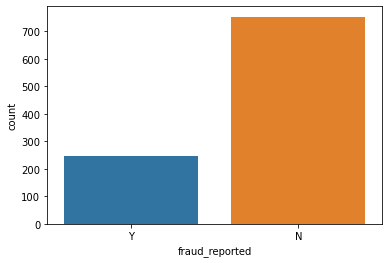

In [429]:
sns.countplot(x=df['fraud_reported'])

Observations: Dataset is very imbalanced

['OH' 'IN' 'IL']


C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='policy_state', ylabel='count'>

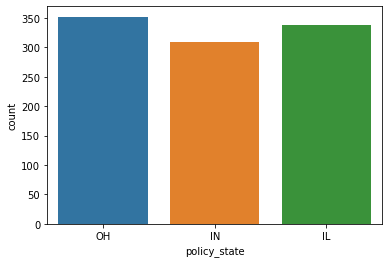

In [430]:
#Checking the policy_state column
print(df['policy_state'].unique())
sns.countplot(df['policy_state'])

Obsrervation: The policies are registered in 3 different states - OH,IL and IN

[1000 2000  500]

C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='policy_deductable', ylabel='count'>

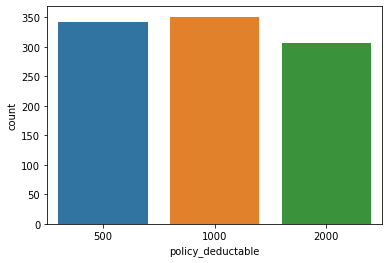

In [431]:
# Checking the policy deductable column
print(df['policy_deductable'].unique())
sns.countplot(df['policy_deductable'])

['MALE' 'FEMALE']


C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='insured_sex', ylabel='count'>

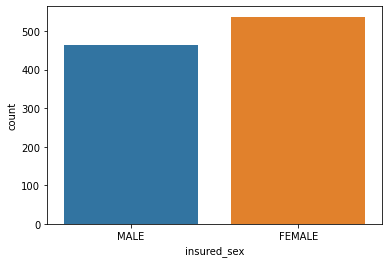

In [432]:
# Checking the insured sex column
print(df['insured_sex'].unique())
sns.countplot(df['insured_sex'])

Observation: Most of the people insured are Females

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


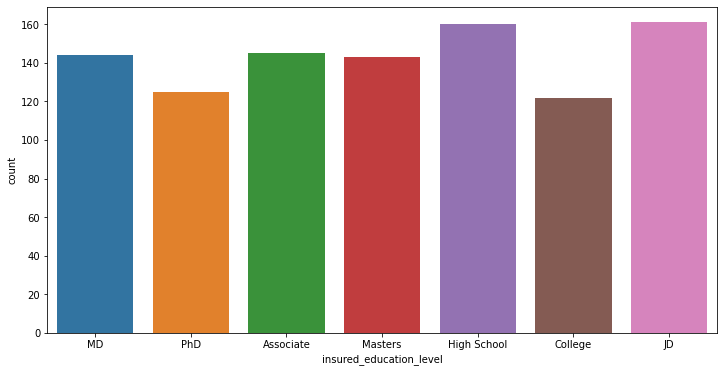

In [433]:
# Checking the education level of the customers
print(df['insured_education_level'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(df['insured_education_level'])
plt.show()

In [434]:
df.sample()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
492,298,49,795004,16-03-1998,OH,250/500,500,862.92,0,448809,MALE,MD,machine-op-inspct,camping,wife,0,-71700,17-01-2015,Multi-vehicle Collision,Side Collision,Major Damage,Other,NY,Northbrook,6479 Francis Ave,16,3,NO,0,2,NO,69480,11580,11580,46320,Saab,95,2007,N,NaN


In [435]:
df['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


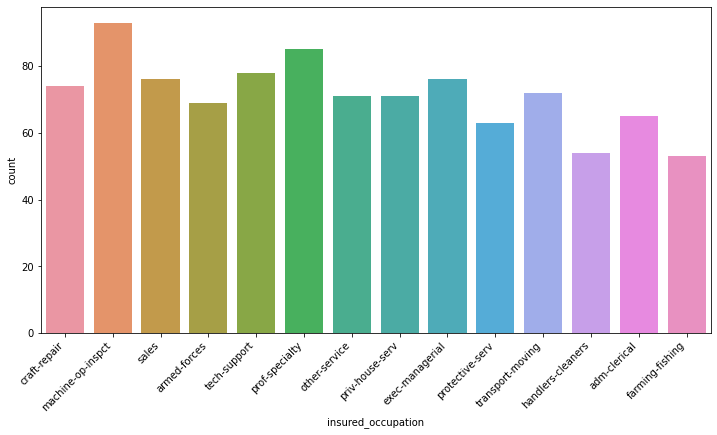

In [436]:
plt.figure(figsize=(12,6))
sns.countplot(df['insured_occupation'])
plt.xticks(rotation =45, ha='right')
plt.show()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


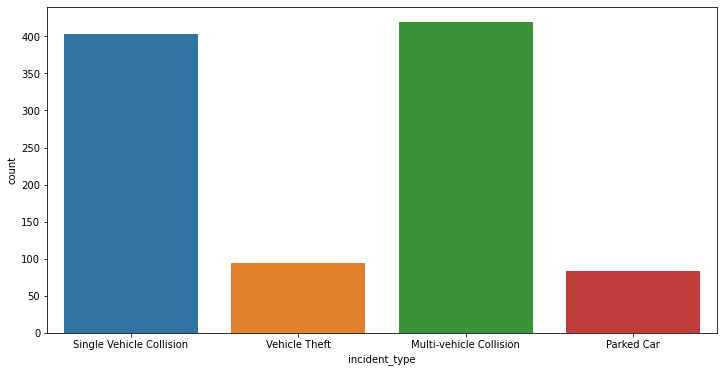

In [437]:
# Checking the incident_type column
print(df['incident_type'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(df['incident_type'])
plt.show()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


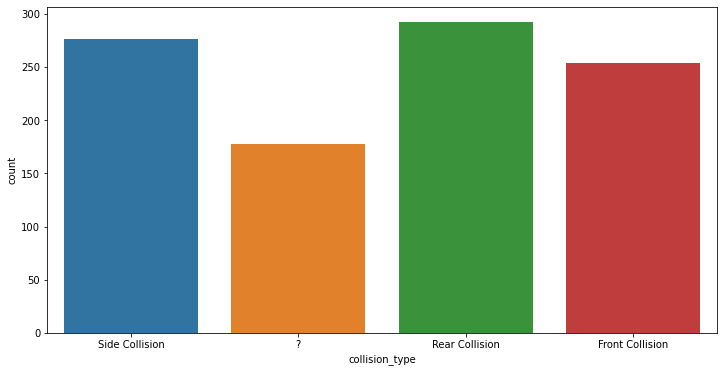

In [438]:
# Checking the collision_type column
print(df['collision_type'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(df['collision_type'])
plt.show()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


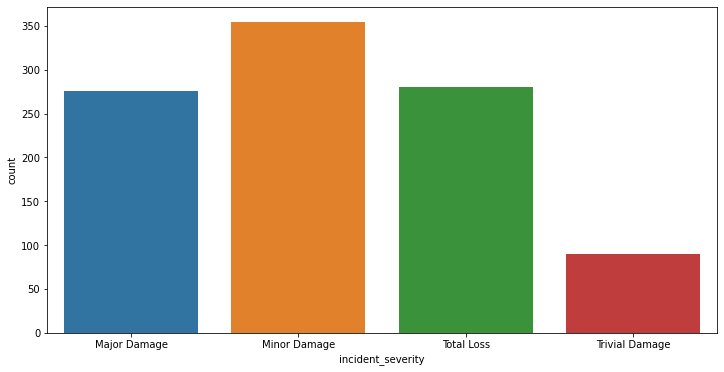

In [439]:
# Checking the incident_severity column
print(df['incident_severity'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(df['incident_severity'])
plt.show()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


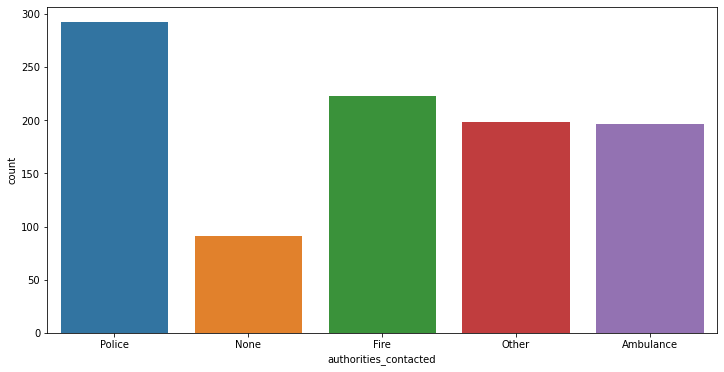

In [440]:
# Checking the authorities_contacted column
print(df['authorities_contacted'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(df['authorities_contacted'])
plt.show()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


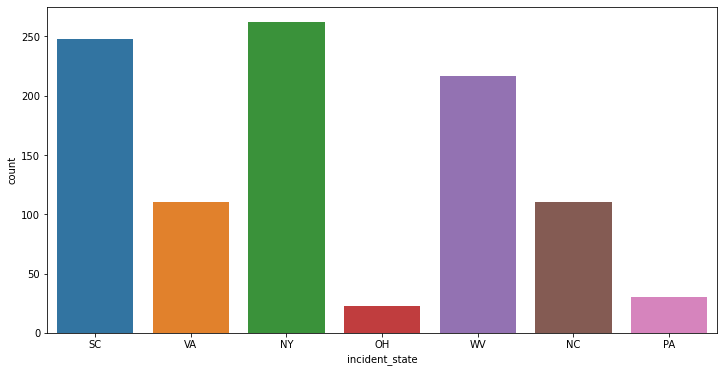

In [441]:
# Checking the incident_state column
print(df['incident_state'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(df['incident_state'])
plt.show()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


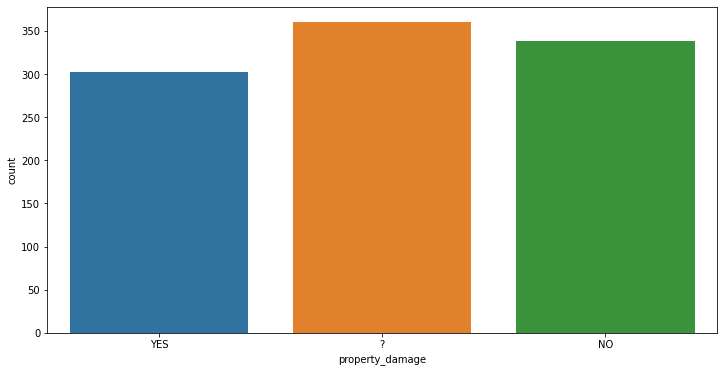

In [442]:
# Checking the property_damage column
print(df['property_damage'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(df['property_damage'])
plt.show()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


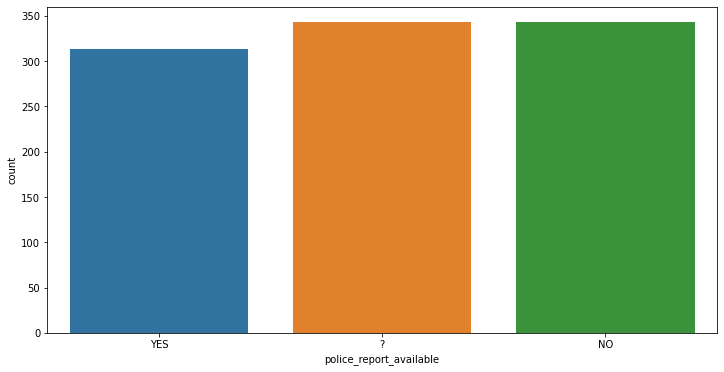

In [443]:
# Checking the police_report_available column
print(df['police_report_available'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(df['police_report_available'])
plt.show()

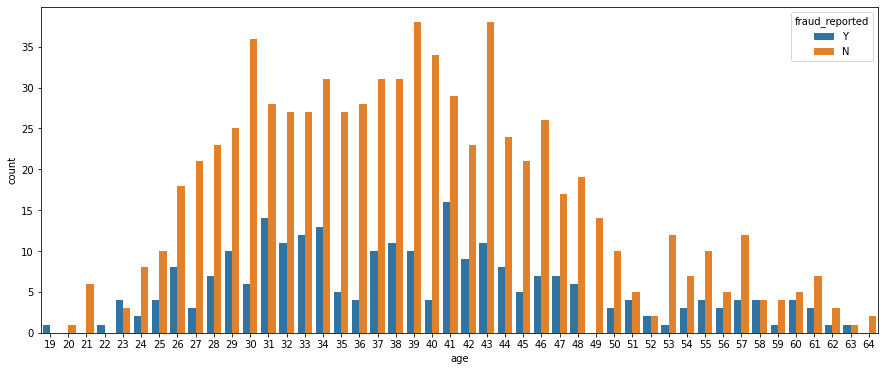

In [444]:
# Checking the age vs fraud column
plt.figure(figsize=(15,6))
sns.countplot( x="age",hue = 'fraud_reported',data=df)
plt.show()

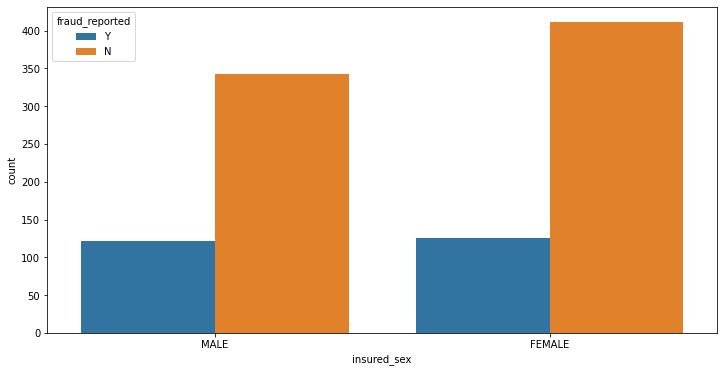

In [445]:
# Checking the sex vs fraud column
plt.figure(figsize=(12,6))
sns.countplot( x="insured_sex",hue = 'fraud_reported',data=df)
plt.show()

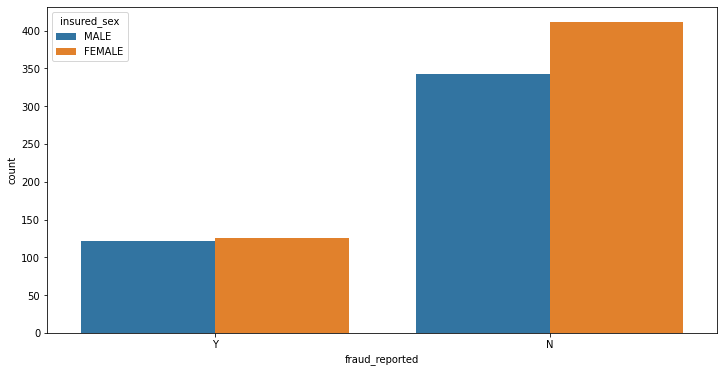

In [446]:
# Checking the sex vs fraud column
plt.figure(figsize=(12,6))
sns.countplot( x="fraud_reported",hue = 'insured_sex',data=df)
plt.show()

In [447]:
df[df['fraud_reported']=='Y']['insured_sex'].value_counts()

FEMALE    126
MALE      121
Name: insured_sex, dtype: int64

Observation: 126 female and 121 male customers claims have been reported as fraud

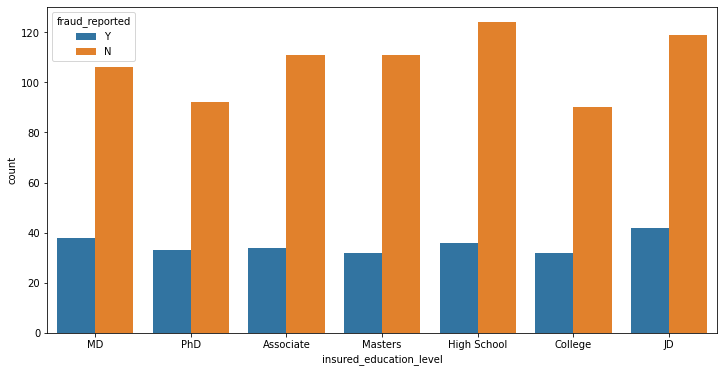

In [448]:
# Checking the education level vs fraud column
plt.figure(figsize=(12,6))
sns.countplot( x="insured_education_level",hue = 'fraud_reported',data=df)
plt.show()

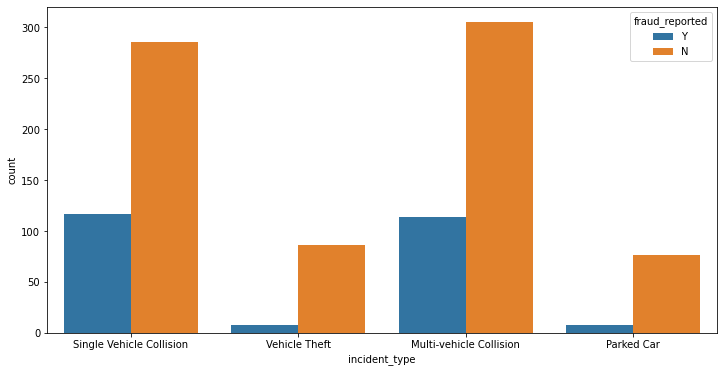

In [449]:
# Checking the incident_type vs fraud column
plt.figure(figsize=(12,6))
sns.countplot( x="incident_type",hue = 'fraud_reported',data=df)
plt.show()

Observation: Most of the frauds reported are of collission type 

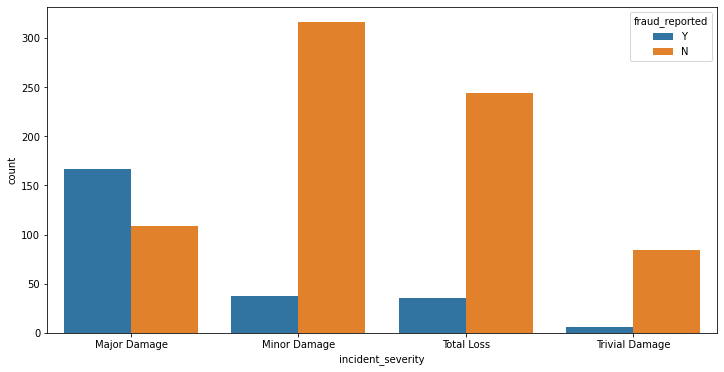

In [450]:
# Checking the incident_severity vs fraud column
plt.figure(figsize=(12,6))
sns.countplot( x="incident_severity",hue = 'fraud_reported',data=df)
plt.show()

In [451]:
df[df['fraud_reported']=='Y']['incident_severity'].value_counts()

Major Damage      167
Minor Damage       38
Total Loss         36
Trivial Damage      6
Name: incident_severity, dtype: int64

Observation: Most of the frauds were reported as major damage 

In [452]:
df[df['fraud_reported']=='Y']['authorities_contacted'].value_counts()

Other        63
Police       61
Fire         60
Ambulance    57
None          6
Name: authorities_contacted, dtype: int64

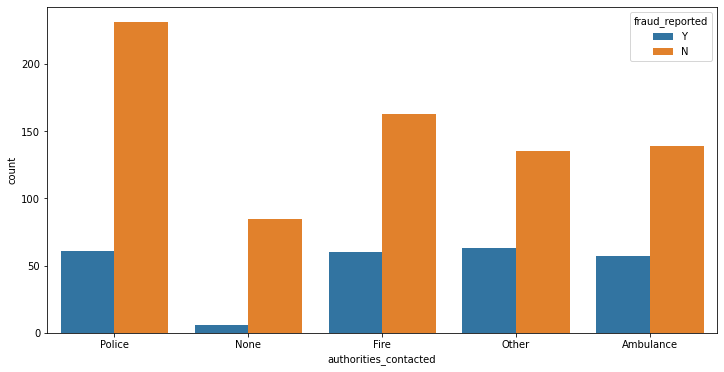

In [453]:
# Checking the authorities_contacted vs fraud column
plt.figure(figsize=(12,6))
sns.countplot( x="authorities_contacted",hue = 'fraud_reported',data=df)
plt.show()

In [454]:
df[df['fraud_reported']=='Y']['number_of_vehicles_involved'].value_counts()

1    133
3     94
4     11
2      9
Name: number_of_vehicles_involved, dtype: int64

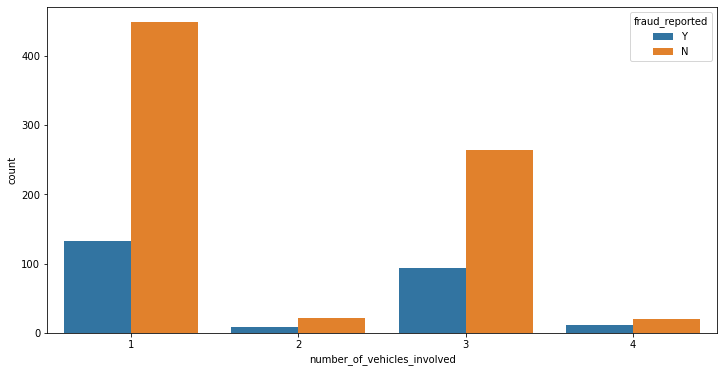

In [455]:
# Checking the number_of_vehicles_involved vs fraud column
plt.figure(figsize=(12,6))
sns.countplot( x="number_of_vehicles_involved",hue = 'fraud_reported',data=df)
plt.show()

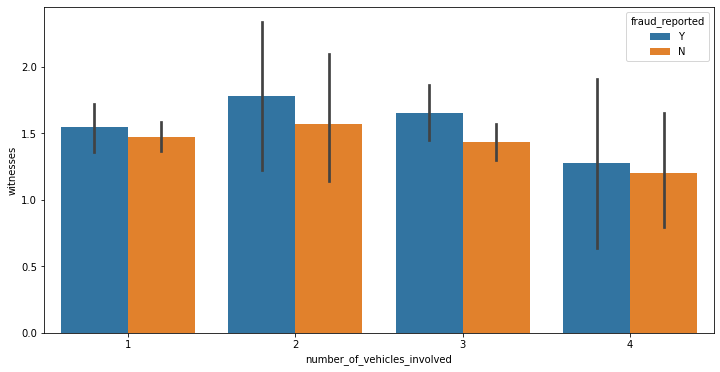

In [456]:
# Checking the number_of_vehicles_involved vs Witness column
plt.figure(figsize=(12,6))
sns.barplot( x="number_of_vehicles_involved",y = 'witnesses',hue='fraud_reported',data=df)
plt.show()

Observation: Most cases where fraud was reported was involving mostly only 1 vehicle  followed by incidents with 3 vehicles involved

?      103
YES     78
NO      66
Name: property_damage, dtype: int64


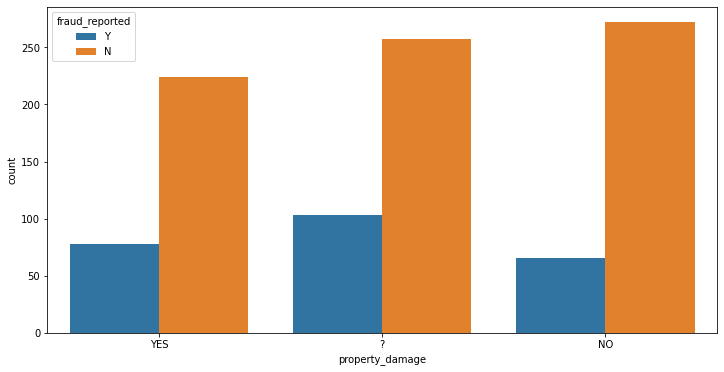

In [457]:
# Checking the property_damage vs fraud column

print(df[df['fraud_reported']=='Y']['property_damage'].value_counts())

plt.figure(figsize=(12,6))
sns.countplot( x="property_damage",hue = 'fraud_reported',data=df)
plt.show()

16    16
10    15
14    15
23    14
18    14
6     14
15    13
3     12
0     12
11    12
21    10
2     10
5      9
20     9
19     9
17     8
13     8
7      8
1      8
4      8
12     8
8      6
22     5
9      4
Name: incident_hour_of_the_day, dtype: int64


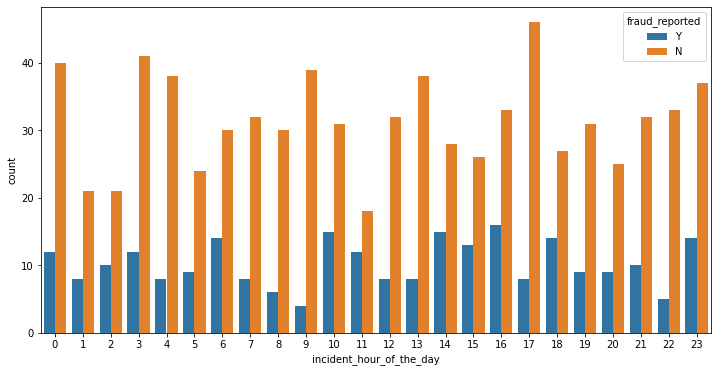

In [458]:
# Checking the incident_hour_of_the_day vs fraud column

print(df[df['fraud_reported']=='Y']['incident_hour_of_the_day'].value_counts())

plt.figure(figsize=(12,6))
sns.countplot( x="incident_hour_of_the_day",hue = 'fraud_reported',data=df)
plt.show()

2    74
1    63
3    60
0    50
Name: witnesses, dtype: int64


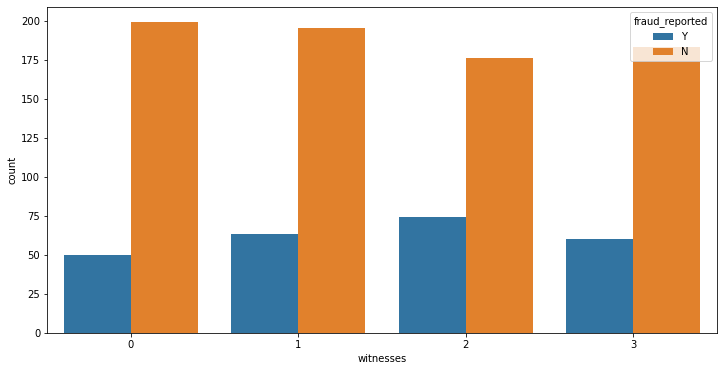

In [459]:
# Checking the witnesses vs fraud column

print(df[df['fraud_reported']=='Y']['witnesses'].value_counts())

plt.figure(figsize=(12,6))
sns.countplot( x="witnesses",hue = 'fraud_reported',data=df)
plt.show()

?      89
NO     86
YES    72
Name: police_report_available, dtype: int64


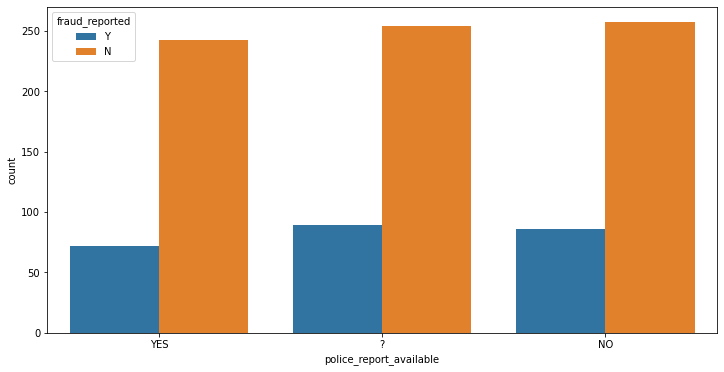

In [460]:
# Checking the police_report_available vs fraud column

print(df[df['fraud_reported']=='Y']['police_report_available'].value_counts())

plt.figure(figsize=(12,6))
sns.countplot( x="police_report_available",hue = 'fraud_reported',data=df)
plt.show()

2    90
0    80
1    77
Name: bodily_injuries, dtype: int64


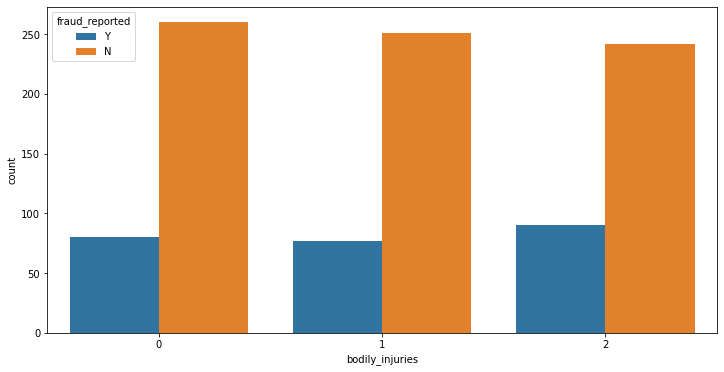

In [461]:
# Checking the bodily_injuries vs fraud column

print(df[df['fraud_reported']=='Y']['bodily_injuries'].value_counts())

plt.figure(figsize=(12,6))
sns.countplot( x="bodily_injuries",hue = 'fraud_reported',data=df)
plt.show()

# Feature Engineering

In [462]:
df[['policy_bind_date','incident_date']] = df[['policy_bind_date','incident_date']].apply(pd.to_datetime)

In [463]:
df['insured_yr'] = df['policy_bind_date'].dt.year

In [464]:
df['incident_yr'] = df['incident_date'].dt.year

In [465]:
 df['age_of_policy'] = df['incident_yr']-df['insured_yr']

In [466]:
df.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,insured_yr,incident_yr,age_of_policy
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN,2014,2015,1
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN,2006,2015,9


In [467]:
# Handling missing values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [468]:
df.drop('_c39',axis=1,inplace =True)

In [469]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [470]:
# Handling Categorical columns

In [471]:
for i in cat_cols:
    print(i,':',df[i].nunique())

policy_bind_date : 951
policy_state : 3
policy_csl : 3
insured_sex : 2
insured_education_level : 7
insured_occupation : 14
insured_hobbies : 20
insured_relationship : 6
incident_date : 60
incident_type : 4
collision_type : 4
incident_severity : 4
authorities_contacted : 5
incident_state : 7
incident_city : 7
incident_location : 1000
property_damage : 3
police_report_available : 3
auto_make : 14
auto_model : 39
fraud_reported : 2


In [472]:
df.sample()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,insured_yr,incident_yr,age_of_policy
443,120,34,312940,2001-10-27,IN,500/1000,1000,1056.71,0,464630,FEMALE,JD,protective-serv,paintball,not-in-family,77900,0,2015-01-20,Parked Car,?,Minor Damage,None,VA,Columbus,3805 Lincoln Hwy,3,1,NO,2,1,?,3770,580,580,2610,Jeep,Grand Cherokee,2002,N,2001,2015,14


In [473]:
df = df[['insured_sex', 'insured_occupation','insured_hobbies', 'capital-gains', 'capital-loss', 'incident_type', 
 'collision_type', 'incident_severity','policy_state','authorities_contacted', 'incident_hour_of_the_day', 'incident_state',
 'number_of_vehicles_involved','witnesses', 'total_claim_amount', 'fraud_reported', 'age',
       'months_as_customer', 'policy_annual_premium','age_of_policy']]

In [474]:
df

,insured_sex,insured_occupation,insured_hobbies,capital-gains,capital-loss,incident_type,collision_type,incident_severity,policy_state,authorities_contacted,incident_hour_of_the_day,incident_state,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,age,months_as_customer,policy_annual_premium,age_of_policy
0,MALE,craft-repair,sleeping,53300,0,Single Vehicle Collision,Side Collision,Major Damage,OH,Police,5,SC,1,2,71610,Y,48,328,1406.91,1
1,MALE,machine-op-inspct,reading,0,0,Vehicle Theft,?,Minor Damage,IN,Police,8,VA,1,0,5070,Y,42,228,1197.22,9
2,FEMALE,sales,board-games,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,OH,Police,7,NY,3,3,34650,N,29,134,1413.14,15
3,FEMALE,armed-forces,board-games,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,IL,Police,5,OH,1,2,63400,Y,41,256,1415.74,25
4,MALE,sales,board-games,66000,-46000,Vehicle Theft,?,Minor Damage,IL,None,20,NY,1,1,6500,N,44,228,1583.91,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,FEMALE,craft-repair,paintball,0,0,Single Vehicle Collision,Front Collision,Minor Damage,OH,Fire,20,NC,1,1,87200,N,38,3,1310.80,24
996,FEMALE,prof-specialty,sleeping,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,IL,Fire,23,SC,1,3,108480,N,41,285,1436.79,1
997,FEMALE,armed-forces,bungie-jumping,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,OH,Police,4,NC,3,3,67500,N,34,130,1383.49,12
998,MALE,handlers-cleaners,base-jumping,0,0,Single Vehicle Collision,Rear Collision,Major Damage,IL,Other,2,NY,1,1,46980,N,62,458,1356.92,4


In [475]:
cat_columns = []
for i in df.columns:
    if df[i].dtypes=='O':
        cat_columns.append(i)

In [476]:
cat_columns

['insured_sex',
 'insured_occupation',
 'insured_hobbies',
 'incident_type',
 'collision_type',
 'incident_severity',
 'policy_state',
 'authorities_contacted',
 'incident_state',
 'fraud_reported']

In [477]:
df[cat_columns]

,insured_sex,insured_occupation,insured_hobbies,incident_type,collision_type,incident_severity,policy_state,authorities_contacted,incident_state,fraud_reported
0,MALE,craft-repair,sleeping,Single Vehicle Collision,Side Collision,Major Damage,OH,Police,SC,Y
1,MALE,machine-op-inspct,reading,Vehicle Theft,?,Minor Damage,IN,Police,VA,Y
2,FEMALE,sales,board-games,Multi-vehicle Collision,Rear Collision,Minor Damage,OH,Police,NY,N
3,FEMALE,armed-forces,board-games,Single Vehicle Collision,Front Collision,Major Damage,IL,Police,OH,Y
4,MALE,sales,board-games,Vehicle Theft,?,Minor Damage,IL,None,NY,N
...,...,...,...,...,...,...,...,...,...,...
995,FEMALE,craft-repair,paintball,Single Vehicle Collision,Front Collision,Minor Damage,OH,Fire,NC,N
996,FEMALE,prof-specialty,sleeping,Single Vehicle Collision,Rear Collision,Major Damage,IL,Fire,SC,N
997,FEMALE,armed-forces,bungie-jumping,Multi-vehicle Collision,Side Collision,Minor Damage,OH,Police,NC,N
998,MALE,handlers-cleaners,base-jumping,Single Vehicle Collision,Rear Collision,Major Damage,IL,Other,NY,N


In [478]:
from sklearn.preprocessing import LabelEncoder

In [479]:
le = LabelEncoder()

In [480]:
df

,insured_sex,insured_occupation,insured_hobbies,capital-gains,capital-loss,incident_type,collision_type,incident_severity,policy_state,authorities_contacted,incident_hour_of_the_day,incident_state,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,age,months_as_customer,policy_annual_premium,age_of_policy
0,MALE,craft-repair,sleeping,53300,0,Single Vehicle Collision,Side Collision,Major Damage,OH,Police,5,SC,1,2,71610,Y,48,328,1406.91,1
1,MALE,machine-op-inspct,reading,0,0,Vehicle Theft,?,Minor Damage,IN,Police,8,VA,1,0,5070,Y,42,228,1197.22,9
2,FEMALE,sales,board-games,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,OH,Police,7,NY,3,3,34650,N,29,134,1413.14,15
3,FEMALE,armed-forces,board-games,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,IL,Police,5,OH,1,2,63400,Y,41,256,1415.74,25
4,MALE,sales,board-games,66000,-46000,Vehicle Theft,?,Minor Damage,IL,None,20,NY,1,1,6500,N,44,228,1583.91,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,FEMALE,craft-repair,paintball,0,0,Single Vehicle Collision,Front Collision,Minor Damage,OH,Fire,20,NC,1,1,87200,N,38,3,1310.80,24
996,FEMALE,prof-specialty,sleeping,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,IL,Fire,23,SC,1,3,108480,N,41,285,1436.79,1
997,FEMALE,armed-forces,bungie-jumping,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,OH,Police,4,NC,3,3,67500,N,34,130,1383.49,12
998,MALE,handlers-cleaners,base-jumping,0,0,Single Vehicle Collision,Rear Collision,Major Damage,IL,Other,2,NY,1,1,46980,N,62,458,1356.92,4


In [481]:
num_columns = []
for i in df.columns:
    if df[i].dtypes!='O':
        num_columns.append(i)

In [483]:
num_columns


['capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'witnesses',
 'total_claim_amount',
 'age',
 'months_as_customer',
 'policy_annual_premium',
 'age_of_policy']

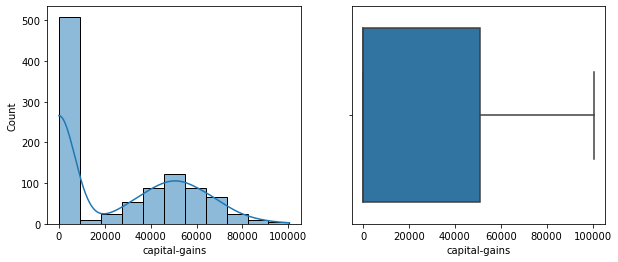

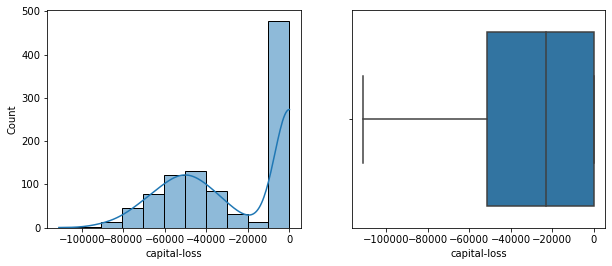

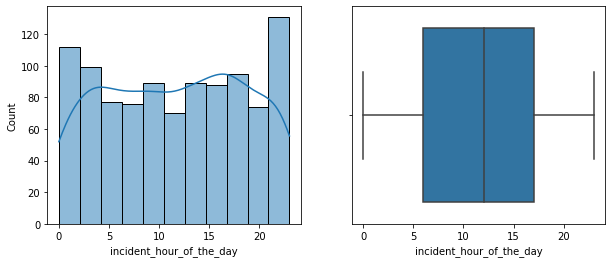

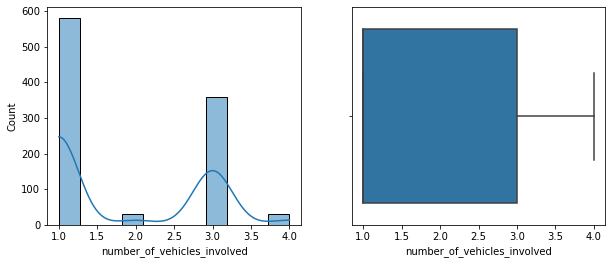

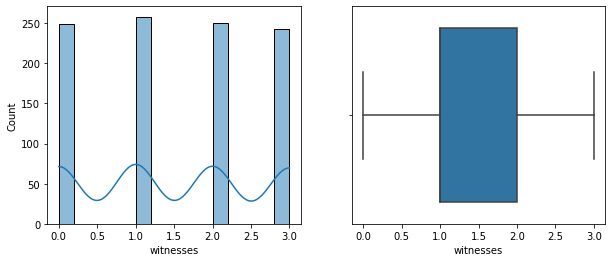

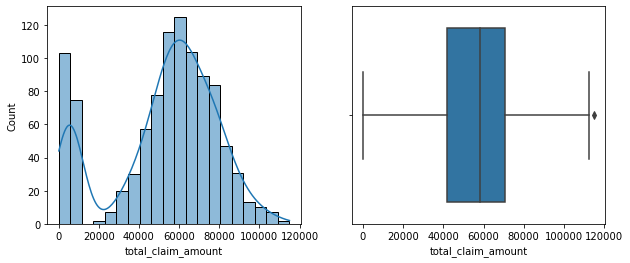

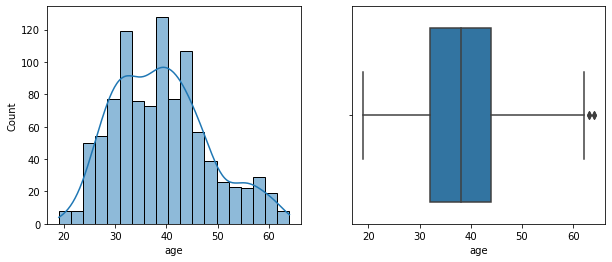

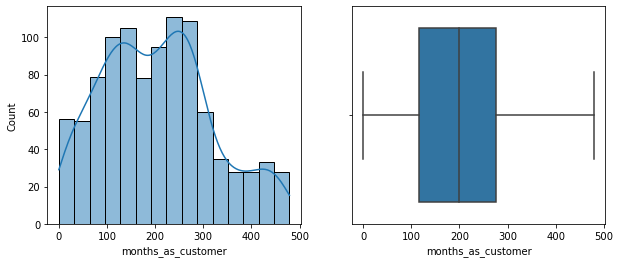

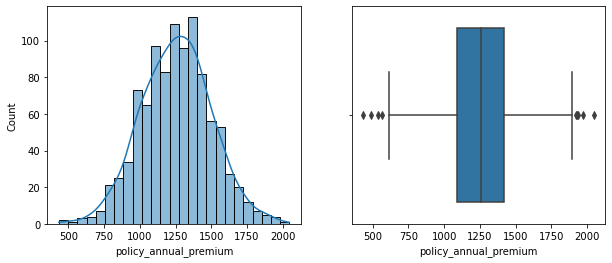

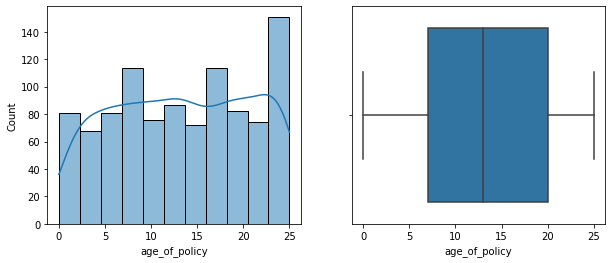

In [492]:
for col in num_columns:
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    sns.histplot(data=df, x=col, ax=ax[0],kde=True)
    sns.boxplot(data=df, x=col, ax=ax[1]);

In [493]:
df.skew()

C:\Users\bhanu\AppData\Local\Temp/ipykernel_9616/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
witnesses                      0.019636
total_claim_amount            -0.594582
age                            0.478988
months_as_customer             0.362177
policy_annual_premium          0.004402
age_of_policy                 -0.052511
dtype: float64

In [496]:
# Removing outliers
olc = df[['total_claim_amount','age','policy_annual_premium']]

### Z-Score method

In [497]:
from scipy.stats import zscore
zs = np.abs(zscore(olc))
zs

,total_claim_amount,age,policy_annual_premium
0,0.714257,0.990836,0.616705
1,1.807312,0.334073,0.242521
2,0.686362,1.088913,0.642233
3,0.403135,0.224613,0.652886
4,1.753121,0.552994,1.341980
...,...,...,...
995,1.305049,0.103769,0.222884
996,2.111466,0.224613,0.739141
997,0.558507,0.541611,0.520739
998,0.219110,2.523284,0.411866


In [498]:
# Creating new dataframe
df_zs = df[(zs<3).all(axis=1)]
df_zs.head()

,insured_sex,insured_occupation,insured_hobbies,capital-gains,capital-loss,incident_type,collision_type,incident_severity,policy_state,authorities_contacted,incident_hour_of_the_day,incident_state,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,age,months_as_customer,policy_annual_premium,age_of_policy
0,MALE,craft-repair,sleeping,53300,0,Single Vehicle Collision,Side Collision,Major Damage,OH,Police,5,SC,1,2,71610,Y,48,328,1406.91,1
1,MALE,machine-op-inspct,reading,0,0,Vehicle Theft,?,Minor Damage,IN,Police,8,VA,1,0,5070,Y,42,228,1197.22,9
2,FEMALE,sales,board-games,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,OH,Police,7,NY,3,3,34650,N,29,134,1413.14,15
3,FEMALE,armed-forces,board-games,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,IL,Police,5,OH,1,2,63400,Y,41,256,1415.74,25
4,MALE,sales,board-games,66000,-46000,Vehicle Theft,?,Minor Damage,IL,None,20,NY,1,1,6500,N,44,228,1583.91,1


In [499]:
df.shape

(1000, 20)

In [500]:
df_zs.shape

(997, 20)

In [501]:
#Checking data loss after performing z-score
data_loss = (1000-997)/1000*100
data_loss

0.3

### IQR Method

In [502]:
# 1st quantile
Q1 = olc.quantile(0.25)
# 3rd quantile
Q3 = olc.quantile(0.75)
# IQR
IQR = Q3 - Q1

df_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\bhanu\AppData\Local\Temp/ipykernel_9616/3070196083.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [503]:
df_iqr.shape

(986, 20)

In [504]:
#Checking data loss after performing z-score
data_loss = (1000-986)/1000*100
data_loss

1.4000000000000001

There is a 1.4% loss in data with IQR method as compared to 0.3% with Z-score emthod.

So, i am using the Z-Score method

In [505]:
df.head()

,insured_sex,insured_occupation,insured_hobbies,capital-gains,capital-loss,incident_type,collision_type,incident_severity,policy_state,authorities_contacted,incident_hour_of_the_day,incident_state,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,age,months_as_customer,policy_annual_premium,age_of_policy
0,MALE,craft-repair,sleeping,53300,0,Single Vehicle Collision,Side Collision,Major Damage,OH,Police,5,SC,1,2,71610,Y,48,328,1406.91,1
1,MALE,machine-op-inspct,reading,0,0,Vehicle Theft,?,Minor Damage,IN,Police,8,VA,1,0,5070,Y,42,228,1197.22,9
2,FEMALE,sales,board-games,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,OH,Police,7,NY,3,3,34650,N,29,134,1413.14,15
3,FEMALE,armed-forces,board-games,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,IL,Police,5,OH,1,2,63400,Y,41,256,1415.74,25
4,MALE,sales,board-games,66000,-46000,Vehicle Theft,?,Minor Damage,IL,None,20,NY,1,1,6500,N,44,228,1583.91,1


## Scaling th enumerical columns

In [507]:
df[num_columns]

,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,age,months_as_customer,policy_annual_premium,age_of_policy
0,53300,0,5,1,2,71610,48,328,1406.91,1
1,0,0,8,1,0,5070,42,228,1197.22,9
2,35100,0,7,3,3,34650,29,134,1413.14,15
3,48900,-62400,5,1,2,63400,41,256,1415.74,25
4,66000,-46000,20,1,1,6500,44,228,1583.91,1
...,...,...,...,...,...,...,...,...,...,...
995,0,0,20,1,1,87200,38,3,1310.80,24
996,70900,0,23,1,3,108480,41,285,1436.79,1
997,35100,0,4,3,3,67500,34,130,1383.49,12
998,0,0,2,1,1,46980,62,458,1356.92,4


In [508]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [510]:
num_scaled = sc.fit_transform(df[num_columns])

In [518]:
df[num_columns]

,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,age,months_as_customer,policy_annual_premium,age_of_policy
0,53300,0,5,1,2,71610,48,328,1406.91,1
1,0,0,8,1,0,5070,42,228,1197.22,9
2,35100,0,7,3,3,34650,29,134,1413.14,15
3,48900,-62400,5,1,2,63400,41,256,1415.74,25
4,66000,-46000,20,1,1,6500,44,228,1583.91,1
...,...,...,...,...,...,...,...,...,...,...
995,0,0,20,1,1,87200,38,3,1310.80,24
996,70900,0,23,1,3,108480,41,285,1436.79,1
997,35100,0,4,3,3,67500,34,130,1383.49,12
998,0,0,2,1,1,46980,62,458,1356.92,4


In [519]:
df[num_columns] = pd.DataFrame(num_scaled,columns = num_columns)

In [520]:
df

,insured_sex,insured_occupation,insured_hobbies,capital-gains,capital-loss,incident_type,collision_type,incident_severity,policy_state,authorities_contacted,incident_hour_of_the_day,incident_state,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,age,months_as_customer,policy_annual_premium,age_of_policy
0,MALE,craft-repair,sleeping,1.011331,0.953851,Single Vehicle Collision,Side Collision,Major Damage,OH,Police,-0.956261,SC,-0.823865,0.461838,0.714257,Y,0.990836,1.078140,0.616705,-1.684992
1,MALE,machine-op-inspct,reading,-0.901927,0.953851,Vehicle Theft,?,Minor Damage,IN,Police,-0.524475,VA,-0.823865,-1.338700,-1.807312,Y,0.334073,0.208995,-0.242521,-0.597550
2,FEMALE,sales,board-games,0.358023,0.953851,Multi-vehicle Collision,Rear Collision,Minor Damage,OH,Police,-0.668404,NY,1.140056,1.362107,-0.686362,N,-1.088913,-0.608002,0.642233,0.218032
3,FEMALE,armed-forces,board-games,0.853388,-1.267577,Single Vehicle Collision,Front Collision,Major Damage,IL,Police,-0.956261,OH,-0.823865,0.461838,0.403135,Y,0.224613,0.452355,0.652886,1.577335
4,MALE,sales,board-games,1.467210,-0.683741,Vehicle Theft,?,Minor Damage,IL,None,1.202666,NY,-0.823865,-0.438431,-1.753121,N,0.552994,0.208995,1.341980,-1.684992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,FEMALE,craft-repair,paintball,-0.901927,0.953851,Single Vehicle Collision,Front Collision,Minor Damage,OH,Fire,1.202666,NC,-0.823865,-0.438431,1.305049,N,-0.103769,-1.746582,0.222884,1.441405
996,FEMALE,prof-specialty,sleeping,1.643100,0.953851,Single Vehicle Collision,Rear Collision,Major Damage,IL,Fire,1.634452,SC,-0.823865,1.362107,2.111466,N,0.224613,0.704407,0.739141,-1.684992
997,FEMALE,armed-forces,bungie-jumping,0.358023,0.953851,Multi-vehicle Collision,Side Collision,Minor Damage,OH,Police,-1.100189,NC,1.140056,1.362107,0.558507,N,-0.541611,-0.642767,0.520739,-0.189759
998,MALE,handlers-cleaners,base-jumping,-0.901927,0.953851,Single Vehicle Collision,Rear Collision,Major Damage,IL,Other,-1.388046,NY,-0.823865,-0.438431,-0.219110,N,2.523284,2.208028,0.411866,-1.277201


In [ ]:
# Working on Categorical columns

In [522]:
df[cat_columns] = df[cat_columns].apply(le.fit_transform)

In [523]:
df

,insured_sex,insured_occupation,insured_hobbies,capital-gains,capital-loss,incident_type,collision_type,incident_severity,policy_state,authorities_contacted,incident_hour_of_the_day,incident_state,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,age,months_as_customer,policy_annual_premium,age_of_policy
0,1,2,17,1.011331,0.953851,2,3,0,2,4,-0.956261,4,-0.823865,0.461838,0.714257,1,0.990836,1.078140,0.616705,-1.684992
1,1,6,15,-0.901927,0.953851,3,0,1,1,4,-0.524475,5,-0.823865,-1.338700,-1.807312,1,0.334073,0.208995,-0.242521,-0.597550
2,0,11,2,0.358023,0.953851,0,2,1,2,4,-0.668404,1,1.140056,1.362107,-0.686362,0,-1.088913,-0.608002,0.642233,0.218032
3,0,1,2,0.853388,-1.267577,2,1,0,0,4,-0.956261,2,-0.823865,0.461838,0.403135,1,0.224613,0.452355,0.652886,1.577335
4,1,11,2,1.467210,-0.683741,3,0,1,0,2,1.202666,1,-0.823865,-0.438431,-1.753121,0,0.552994,0.208995,1.341980,-1.684992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,2,13,-0.901927,0.953851,2,1,1,2,1,1.202666,0,-0.823865,-0.438431,1.305049,0,-0.103769,-1.746582,0.222884,1.441405
996,0,9,17,1.643100,0.953851,2,2,0,0,1,1.634452,4,-0.823865,1.362107,2.111466,0,0.224613,0.704407,0.739141,-1.684992
997,0,1,3,0.358023,0.953851,0,3,1,2,4,-1.100189,0,1.140056,1.362107,0.558507,0,-0.541611,-0.642767,0.520739,-0.189759
998,1,5,0,-0.901927,0.953851,2,2,0,0,3,-1.388046,1,-0.823865,-0.438431,-0.219110,0,2.523284,2.208028,0.411866,-1.277201


## Splitting the dataset

In [525]:
#Separating dependant and independant columns
X=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

# Oversampling

In [524]:
import imblearn

In [526]:
# Balancing the data using oversampling

from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, y = SM.fit_resample(X,y)

In [527]:
X.shape

(1506, 19)

In [528]:
y.shape

(1506,)

In [529]:
y.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

# Modelling

Finding the best random State

In [530]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
fin_acc=0
fin_rs=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state =i)
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>fin_acc:
        fin_acc=acc
        fin_rs=i
print("Best accuracy is ",fin_acc," on Random_state ",fin_rs)

Best accuracy is  0.8874172185430463  on Random_state  85


In [531]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
fin_acc=0
fin_rs=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state =i)
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    pred = rfc.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>fin_acc:
        fin_acc=acc
        fin_rs=i
print("Best accuracy is ",fin_acc," on Random_state ",fin_rs)

Best accuracy is  0.9139072847682119  on Random_state  63


In [532]:
#importing the classification algorithms.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score

In [534]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state =fin_rs)

# Logistic Regression

In [535]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
log_reg_pred=lr.predict(X_test)
print("Accuracy of the model with Logistic Regressio is: ",accuracy_score(y_test, log_reg_pred)*100,'%', '\n')
print("Confusion matrix is: \n", confusion_matrix(y_test, log_reg_pred))

Accuracy of the model with Logistic Regressio is:  75.16556291390728 % 

Confusion matrix is: 
 [[112  41]
 [ 34 115]]


C:\Users\bhanu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


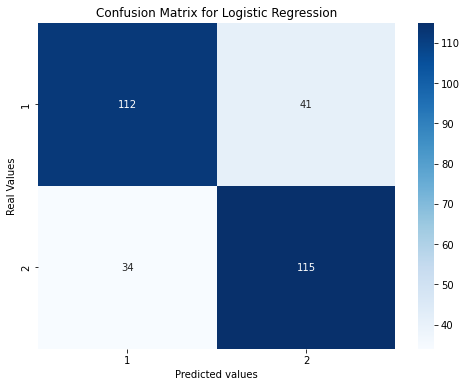

In [540]:
# Confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,log_reg_pred)

x_labels = ['1','2']
y_labels = ['1','2']

f , ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot = True, fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_labels,
yticklabels=y_labels)

plt.xlabel("Predicted values")
plt.ylabel("Real Values")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Decision Tree Classifier

In [537]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)
print("Accuracy of the model with Decision tree Classifier is: ",accuracy_score(y_test, dtc_pred)*100,'%', '\n')
print("Confusion matrix is: \n", confusion_matrix(y_test, dtc_pred))

Accuracy of the model with Decision tree Classifier is:  83.77483443708608 % 

Confusion matrix is: 
 [[127  26]
 [ 23 126]]


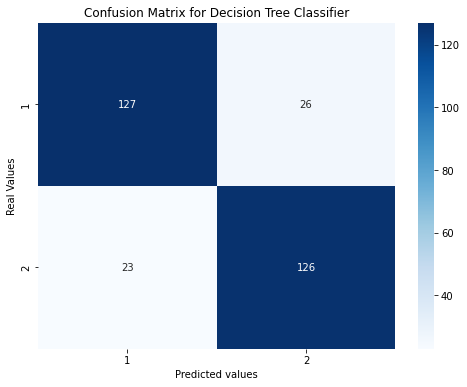

In [539]:
# Confusion matrix for Decision Tree Classifier
cm = confusion_matrix(y_test,dtc_pred)

x_labels = ['1','2']
y_labels = ['1','2']

f , ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot = True, fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_labels,
yticklabels=y_labels)

plt.xlabel("Predicted values")
plt.ylabel("Real Values")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Random Forest Classifier

In [541]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print("Accuracy of the model with Random Forest Classifier is: ",accuracy_score(y_test, rfc_pred)*100,'%', '\n')
print("Confusion matrix is: \n", confusion_matrix(y_test, rfc_pred))

Accuracy of the model with Random Forest Classifier is:  90.72847682119205 % 

Confusion matrix is: 
 [[135  18]
 [ 10 139]]


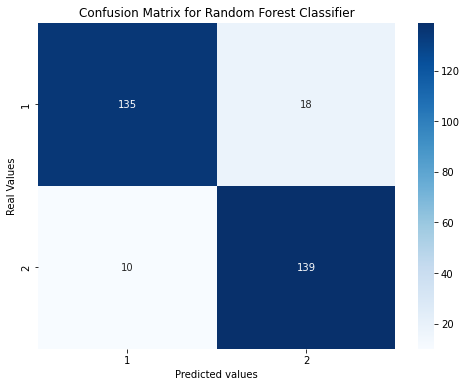

In [542]:
# Confusion matrix for Random Forest Classifier
cm = confusion_matrix(y_test,rfc_pred)

x_labels = ['1','2']
y_labels = ['1','2']

f , ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot = True, fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_labels,
yticklabels=y_labels)

plt.xlabel("Predicted values")
plt.ylabel("Real Values")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# KNN classifier

In [543]:
knn = KNN()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print("Accuracy of the model with KNN Classifier is: ",accuracy_score(y_test, knn_pred)*100,'%', '\n')
print("Confusion matrix is: \n", confusion_matrix(y_test, knn_pred))

Accuracy of the model with KNN Classifier is:  72.84768211920529 % 

Confusion matrix is: 
 [[ 79  74]
 [  8 141]]


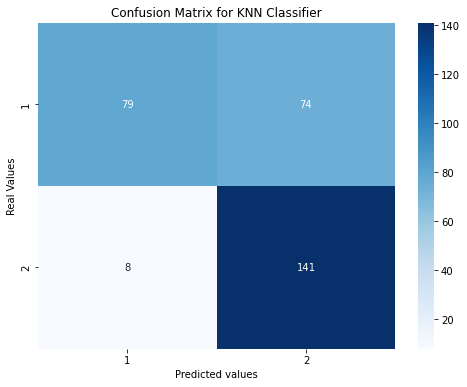

In [544]:
# Confusion matrix for KNN Classifier
cm = confusion_matrix(y_test,knn_pred)

x_labels = ['1','2']
y_labels = ['1','2']

f , ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot = True, fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_labels,
yticklabels=y_labels)

plt.xlabel("Predicted values")
plt.ylabel("Real Values")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

# Cross Validation of the models

In [545]:
from sklearn.model_selection import cross_val_score

In [546]:
# Cross Validation score for Logistic Regression 
print('The accuracy of the Logistic Regression Model with a cross validation of 10 is:',cross_val_score(lr,X,y,cv=10).mean())

The accuracy of the Logistic Regression Model with a cross validation of 10 is: 0.7770066225165564


C:\Users\bhanu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\bhanu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [547]:
# Cross Validation score for Decison Tree Classifier 
print('The accuracy of the Decison Tree Classifier with a cross validation of 10 is:',cross_val_score(dtc,X,y,cv=10).mean())

The accuracy of the Decison Tree Classifier with a cross validation of 10 is: 0.8460927152317881


In [548]:
# Cross Validation score for Random Forest Classifier 
print('The accuracy of the Random Forest Classifier with a cross validation of 10 is:',cross_val_score(rfc,X,y,cv=10).mean())

The accuracy of the Random Forest Classifier with a cross validation of 10 is: 0.8799514348785872


In [549]:
# Cross Validation score for KNN Classifier 
print('The accuracy of the Decison Tree Classifier with a cross validation of 10 is:',cross_val_score(knn,X,y,cv=10).mean())

The accuracy of the Decison Tree Classifier with a cross validation of 10 is: 0.7676688741721854


## Random Forest Classifier is the best model as per the stats

# Hyper parameter tuning
### Tuning the Random Forest Classifier

In [550]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [2,3,4,5,6],'criterion' :['gini', 'entropy', 'log_loss'],'n_estimators': [50,100,200,300,400,500,600]}
rfcgscv = GridSearchCV(estimator = rfc, cv=10,param_grid = params, n_jobs = -1, verbose = 2, return_train_score=True)
rfcgscv.fit(X_train, y_train)

Fitting 10 folds for each of 105 candidates, totalling 1050 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [50, 100, 200, 300, 400, 500, 600]},
             return_train_score=True, verbose=2)

In [551]:
rfcgscv.best_params_

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 100}

In [552]:
fraud = RandomForestClassifier(criterion='gini',max_depth=6, n_estimators=100)
fraud.fit(X_train, y_train)
pred = fraud.predict(X_test)
acc=accuracy_score(y_test,pred)
print('Accuracy is : ',acc*100)

Accuracy is :  87.41721854304636


# Saving the model

In [553]:
import pickle
pickle.dump(fraud,open('Model.pkl','wb'))